In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## some other packages
from scipy import stats
from matplotlib import ticker

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}


## Selected points in the regions
### Gulf S: (60W, 35N)
### Lab -I: (50W, 55N)
### Nor E: (17.5W, 52.5N)
points = {
    'gul': {
        'lon': -60., 
        'lat': 35.
    },
    'lab': {
        'lon': -50., 
        'lat': 55.
    },
    'noe': {
        'lon': -17.5, 
        'lat': 52.5}
}

In [1]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


## Function to crop the dataset
def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))



##Function to calculate MLD, according to a threshold value
def MLD_den(ds, delta):
    h = ds[0]
    d = ds[3]
    
    for i in range(2, len(ds)):
        diff = float(d[i]) - float(d[1])
        print(diff)
        if (diff>=delta):
            return(h[i])
            break

In [4]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)

In [5]:
#c_armor

In [6]:
## Selected points in the regions
### Gulf S: (60W, 35N)
### Lab -I: (50W, 55N)
### Nor E: (17.5W, 52.5N)

gl = Crops('gul', c_armor)
lb = Crops('lab', c_armor)
nr = Crops('noe', c_armor)


p1 = gl.sel(longitude=points['gul']['lon'], latitude=points['gul']['lat'], method='nearest')
p2 = lb.sel(longitude=points['lab']['lon'], latitude=points['lab']['lat'], method='nearest')
p3 = nr.sel(longitude=points['noe']['lon'], latitude=points['noe']['lat'], method='nearest')


f1 = 'G-DTS.csv'
f2 = 'L-DTS.csv'
f3 = 'N-DTS.csv'

t = 0

In [7]:
p3.so[0].values

array([35.419   , 35.370003, 35.372   , 35.369   , 35.370003, 35.365   ,
       35.362   , 35.374   , 35.429   , 35.491   , 35.373   , 35.31    ,
       35.244   , 35.169   , 35.257   , 35.229   , 35.305   , 35.271   ,
       35.102   , 35.017002, 34.983   , 34.96    , 34.943   , 34.927002,
       34.918   , 34.91    , 34.940002, 34.940002, 34.918   , 34.902   ,
             nan,       nan,       nan], dtype=float32)

## Gulf Stream

<IPython.core.display.Javascript object>


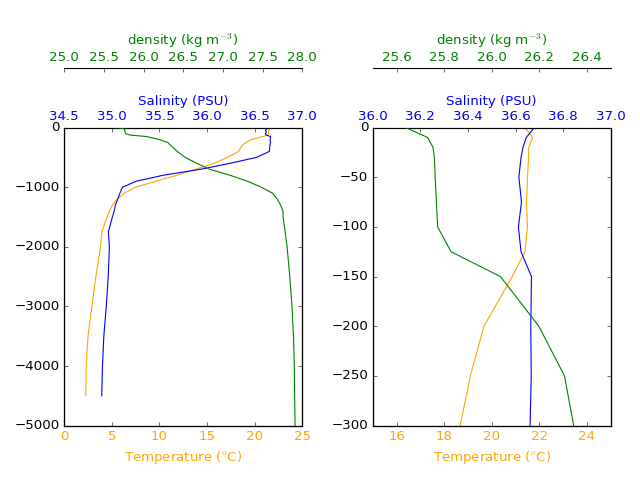

In [8]:
dpt = -p1.depth.values
sal = p1.so[t,:].values
tem = p1.to[t,:].values

g =  pd.read_csv(f1, header=None)

%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=2)
color = 'orange'
ax[0].set_xlabel('Temperature ($^o$C)', color=color)
#ax[0].set_ylabel('Depth (m)')
ax[0].plot(tem, dpt, color=color)
ax[0].tick_params(axis='x', labelcolor=color)
ax[0].set_xlim(0., 25.)


ax2 = ax[0].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(34.5, 37.)


ax3 = ax[0].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(25., 28.)


###Second plot, zoomed
color = 'orange'
ax[1].set_xlabel('Temperature ($^o$C)', color=color)
#ax[1].set_ylabel('Depth (m)')
ax[1].plot(tem, dpt, color=color)
ax[1].tick_params(axis='x', labelcolor=color)
ax[1].set_xlim(15., 25.)

ax2 = ax[1].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(36., 37.)


ax3 = ax[1].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(25.5, 26.5)


plt.ylim(-300., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
MLD_a = p1.mlotst[0].values
MLD_f = MLD_den(g, 0.03)
MLD_v = MLD_den(g, 0.05544207078219188)

print(MLD_a, MLD_f, MLD_v)

0.022261938626112254
0.027945028792597526
0.03138104238928108
0.03138104238928108 25.7623438488622 -50
0.022261938626112254
0.027945028792597526
0.03138104238928108
0.03629330129365016
0.041752019137216934
0.09821283455153207
0.09821283455153207 25.829175641024452 -125
68.0 -50 -125


<IPython.core.display.Javascript object>


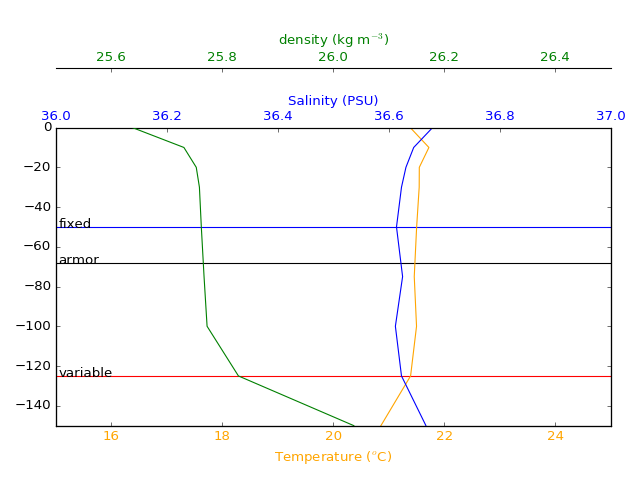

In [10]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=1)
color = 'orange'
ax.set_xlabel('Temperature ($^o$C)', color=color)
#ax.set_ylabel('Depth (m)')
ax.plot(tem, dpt, color=color)
ax.tick_params(axis='x', labelcolor=color)
ax.set_xlim(15., 25.)

xmin = 15.
xmax = 25.
plt.hlines(-MLD_a, xmin, xmax, colors='k', linestyles='solid')
th1 = plt.text(xmin+0.05, -MLD_a-0.75, 'armor')

plt.hlines(MLD_f, xmin, xmax, colors='b', linestyles='solid')
th2 = plt.text(xmin+0.05, MLD_f-0.75, 'fixed')

plt.hlines(MLD_v, xmin, xmax, colors='r', linestyles='solid')
plt.text(xmin+0.05, MLD_v-0.75, 'variable')


ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(36., 37.)

ax3 = ax.twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(25.5, 26.5)

plt.ylim(-150., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Labrador Sea

<IPython.core.display.Javascript object>


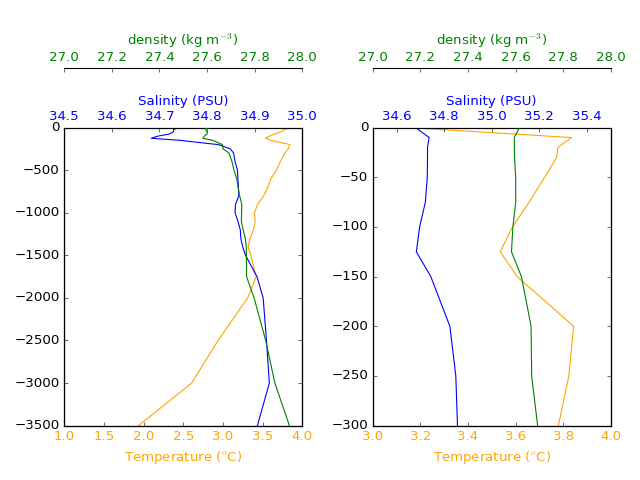

In [11]:
dpt = -p2.depth
sal = p2.so[t,:]
tem = p2.to[t,:]

l =  pd.read_csv(f2, header=None)


%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=2)

color = 'orange'
ax[0].set_xlabel('Temperature ($^o$C)', color=color)
#ax[0].set_ylabel('Depth (m)')
ax[0].plot(tem, dpt, color=color)
ax[0].tick_params(axis='x', labelcolor=color)
ax[0].set_xlim(1., 4.0)
#ax[0].set_xticks(0., 1., 2., 3., 4. )


ax2 = ax[0].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(34.5, 35.)


ax3 = ax[0].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(l[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(27., 28.)


##Second plot, zoom
color = 'orange'
ax[1].set_xlabel('Temperature ($^o$C)', color=color)
#ax[1].set_ylabel('Depth (m)')
ax[1].plot(tem, dpt, color=color)
ax[1].tick_params(axis='x', labelcolor=color)
ax[1].set_xlim(3., 4.)

ax2 = ax[1].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(34.5, 35.5)

ax3 = ax[1].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(l[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(27., 28.)

plt.ylim(-300., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
MLD_a = p2.mlotst[0].values
MLD_f = MLD_den(l, 0.003)
MLD_v = MLD_den(l, 0.020194821414634134)

print(MLD_a)

<IPython.core.display.Javascript object>


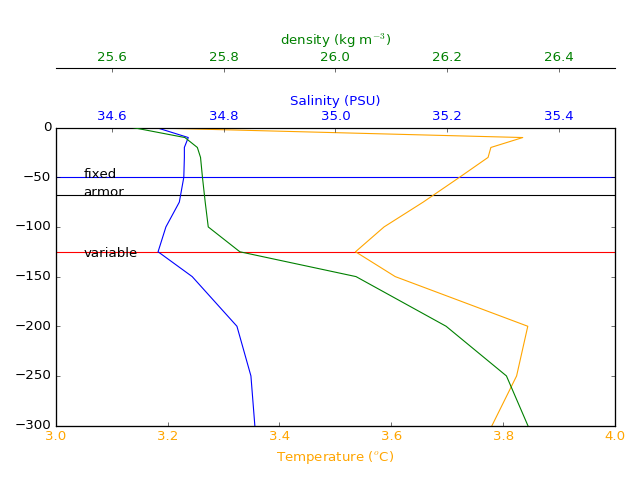

In [12]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=1)
color = 'orange'
ax.set_xlabel('Temperature ($^o$C)', color=color)
#ax.set_ylabel('Depth (m)')
ax.plot(tem, dpt, color=color)
ax.tick_params(axis='x', labelcolor=color)
ax.set_xlim(3., 4.)

xmin = 3.
xmax = 4.
plt.hlines(-MLD_a, xmin, xmax, colors='k', linestyles='solid')
th1 = plt.text(xmin+0.05, -MLD_a-0.75, 'armor')

plt.hlines(MLD_f, xmin, xmax, colors='b', linestyles='solid')
th2 = plt.text(xmin+0.05, MLD_f-0.75, 'fixed')

plt.hlines(MLD_v, xmin, xmax, colors='r', linestyles='solid')
th2 = plt.text(xmin+0.05, MLD_v-5.5, 'variable')


ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(34.5, 35.5)

ax3 = ax.twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(25.5, 26.5)

plt.ylim(-300., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## North East

<IPython.core.display.Javascript object>


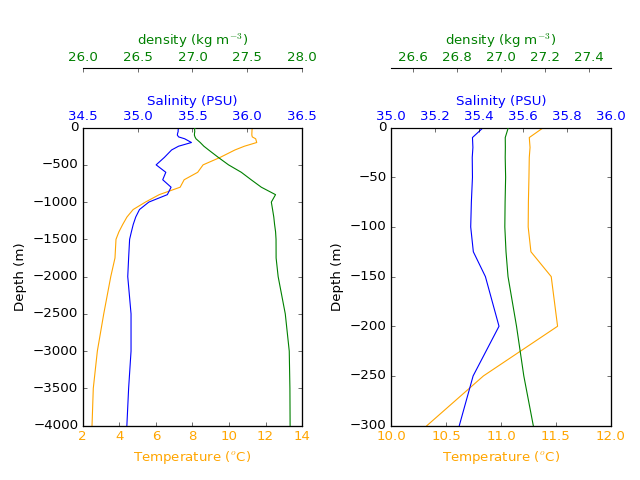

In [13]:
dpt = -p3.depth
sal = p3.so[t,:]
tem = p3.to[t,:]

n =  pd.read_csv(f3, header=None)

%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=2)

color = 'orange'
ax[0].set_xlabel('Temperature ($^o$C)', color=color)
ax[0].set_ylabel('Depth (m)')
ax[0].plot(tem, dpt, color=color)
ax[0].tick_params(axis='x', labelcolor=color)
ax[0].set_xlim(2., 14.)


ax2 = ax[0].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(34.5, 36.5)

ax3 = ax[0].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(n[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(26., 28.)


##Second plot, zoom
color = 'orange'
ax[1].set_xlabel('Temperature ($^o$C)', color=color)
ax[1].set_ylabel('Depth (m)')
ax[1].plot(tem, dpt, color=color)
ax[1].tick_params(axis='x', labelcolor=color)
ax[1].set_xlim(10., 12.)

ax2 = ax[1].twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(35., 36.)

ax3 = ax[1].twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(n[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(26.5, 27.5)

plt.ylim(-300., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [14]:
MLD_a = p3.mlotst[0].values
MLD_f = MLD_den(n, 0.03)
MLD_v = MLD_den(n, 0.036688913895659425)

print(MLD_a)

0.0004937697160549703
-0.00018360490980739996
0.0017145826341185
-0.0006888831444520349
-0.001942776066929497
0.003464834342363332
0.012649375084940573
0.05137023612474323
0.05137023612474323 27.070835721418014 -200
0.0004937697160549703
-0.00018360490980739996
0.0017145826341185
-0.0006888831444520349
-0.001942776066929497
0.003464834342363332
0.012649375084940573
0.05137023612474323
0.05137023612474323 27.070835721418014 -200
181.8999


<IPython.core.display.Javascript object>


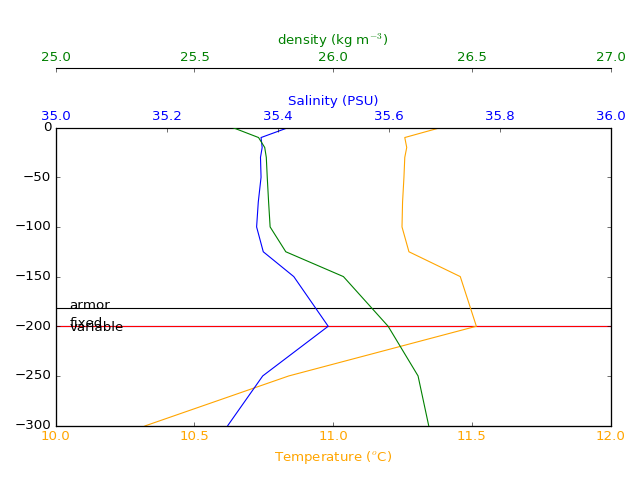

In [17]:
### %matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=1)
color = 'orange'
ax.set_xlabel('Temperature ($^o$C)', color=color)
#ax.set_ylabel('Depth (m)')
ax.plot(tem, dpt, color=color)
ax.tick_params(axis='x', labelcolor=color)
ax.set_xlim(10., 12.)

xmin = 10.
xmax = 22.
plt.hlines(-MLD_a, xmin, xmax, colors='k', linestyles='solid')
th1 = plt.text(10.05, -MLD_a-0.75, 'armor')

plt.hlines(MLD_f, xmin, xmax, colors='b', linestyles='solid')
th2 = plt.text(10.05, MLD_f-0.75, 'fixed')

plt.hlines(MLD_v, xmin, xmax, colors='r', linestyles='solid')
th2 = plt.text(10.05, MLD_v-5, 'variable')

ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.set_xlim(35., 36.)

ax3 = ax.twiny()
color = 'green'
ax3.set_xlabel('density (kg m$^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)
ax3.set_xlim(25., 27.)

plt.ylim(-300., 0)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

 around ~125

### Chosen points

In [15]:
## Selected points in the regions
### Gulf S: (60W, 35N)
### Lab -I: (50W, 55N)
### Nor E: (17.5W, 52.5N)

projection = ccrs.PlateCarree(360)
region = [-90, 0, 10, 70]    #Lon, Lat

<IPython.core.display.Javascript object>


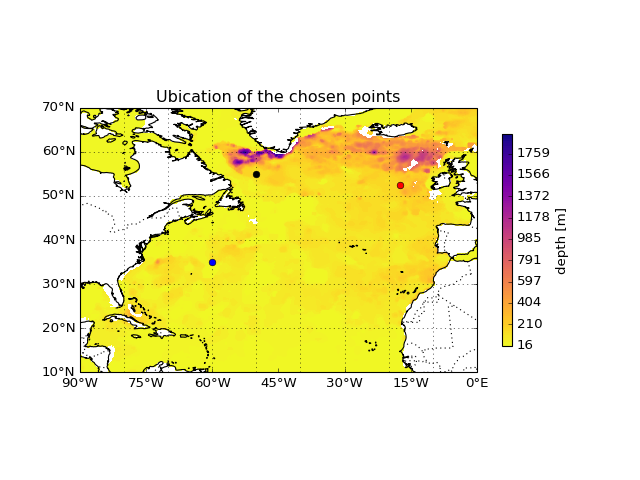

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection=projection))
x_n, y_n = Grid(c_armor.mlotst)

vmin = np.nanmin(c_armor.mlotst.values[0])
vmax = np.nanmax(c_armor.mlotst.values[0]) 

ax.set_global()
ax.coastlines('50m')
ax.set_xticks([-90, -75, -60, -45, -30, -15, 0], crs=ccrs.PlateCarree())
ax.set_yticks([10, 20, 30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
ax.gridlines()

contr = ax.contourf(x_n, y_n, c_armor.mlotst[0], levels=np.linspace(vmin,vmax,100), cmap='plasma_r')
ax.set_title( 'Ubication of the chosen points' )

ax.plot(points['gul']['lon'], points['gul']['lat'], color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

ax.plot(points['lab']['lon'], points['lab']['lat'], color='k', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

ax.plot(points['noe']['lon'], points['noe']['lat'], color='r', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

fig.colorbar(contr, ax=ax, shrink=0.55, label=color_bar['title_cbr'])
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.3)
plt.show()
#plt.savefig(name, bbox_inches='tight')

In [2]:
import gsw

ImportError: No module named 'gsw'